In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, classification_report, r2_score, f1_score, confusion_matrix, precision_score, recall_score

In [62]:
df=pd.read_csv('Data_for_UCI_named.csv')
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [3]:
df.isna().sum().sort_values(ascending=False)

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [4]:
df.shape

(10000, 14)

In [5]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [6]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

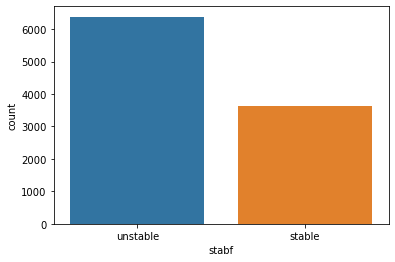

In [7]:
sns.countplot(x='stabf', data=df)
plt.show()

In [8]:
df=df.drop('stab', axis=1)

In [9]:
df=pd.get_dummies(df, drop_first=True)


In [10]:
df.rename(columns={'stabf_unstable': 'stabf'}, inplace=True)
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,1
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,0
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,0
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,1


In [11]:
df['stabf'].value_counts()

1    6380
0    3620
Name: stabf, dtype: int64

In [12]:
X=df.drop('stabf', axis=1).values

y=df['stabf'].values.reshape(-1,1)

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
scaler=StandardScaler()

In [15]:
# scaling the data so that they all have a variance of 1
x_train_scaled=scaler.fit_transform(X_train)

x_test_scaled=scaler.fit_transform(X_test)

y_train_scaled=scaler.fit_transform(y_train)

print(x_train_scaled.var())
print('\n', x_test_scaled.var())

1.0000000000000007

 1.0000000000000004


### Random Forest Classifier

In [16]:
rfc=RandomForestClassifier(random_state=1)
rfc.fit(x_train_scaled, y_train)
rfc_pred=rfc.predict(x_test_scaled)

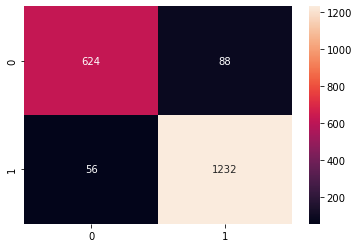

In [17]:
cm=confusion_matrix(y_true=y_test, y_pred=rfc_pred) 
sns.heatmap(cm, annot=True, fmt='')
plt.show()

In [18]:
print('accuracy : {}' .format(accuracy_score(y_test, rfc_pred)))

accuracy : 0.928


In [19]:
print('f1_score : {}' .format(f1_score(y_test, rfc_pred)))

f1_score : 0.9447852760736196


In [20]:
print('precision_score : {}' .format(precision_score(y_test, rfc_pred)))

precision_score : 0.9333333333333333


In [21]:
print('recall_score : {}' .format(recall_score(y_test, rfc_pred)))

recall_score : 0.9565217391304348


### Extra Trees Classifier

In [22]:
etc=ExtraTreesClassifier(random_state=1)
etc.fit(x_train_scaled, y_train)
etc_pred=etc.predict(x_test_scaled)

<AxesSubplot:>

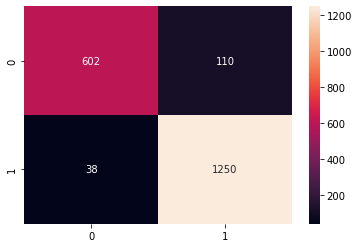

In [23]:
cm1=confusion_matrix(y_true=y_test, y_pred=etc_pred) 
sns.heatmap(cm1, annot=True, fmt='')

In [24]:
print('accuracy : {}' .format(accuracy_score(y_test, etc_pred)))

accuracy : 0.926


In [25]:
print('f1 score : {}'.format(f1_score(y_test, etc_pred)))

f1 score : 0.9441087613293052


In [26]:
print('precision: {}' .format(precision_score(y_test, etc_pred)))

precision: 0.9191176470588235


In [27]:
print('recall_score : {}' .format(recall_score(y_true=y_test, y_pred=etc_pred)))

recall_score : 0.9704968944099379


### xgboost

In [28]:
import xgboost as xgb

In [29]:
xg_boost=xgb.XGBClassifier(random_state=1)
xg_boost.fit(x_train_scaled,y_train)
xgb_pred=xg_boost.predict(x_test_scaled)

<AxesSubplot:>

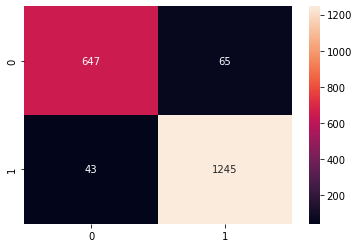

In [30]:
cm2=confusion_matrix(y_true=y_test, y_pred=xgb_pred) 
sns.heatmap(cm2, annot=True, fmt='')

In [31]:
print('accuracy : {}' .format(accuracy_score(y_test, xgb_pred)))

accuracy : 0.946


In [32]:
print('f1_score : {}' .format(f1_score(y_test, xgb_pred)))

f1_score : 0.9584295612009238


In [33]:
print('recall_score : {}' .format(recall_score(y_test, xgb_pred)))

recall_score : 0.9666149068322981


In [34]:
print('precision_score : {}' .format(precision_score(y_test, xgb_pred)))

precision_score : 0.950381679389313


### light gradient boosting 

In [35]:
import lightgbm as lgbm

In [36]:
lgb_m=lgbm.LGBMClassifier(random_state=1)
lgb_m.fit(x_train_scaled, y_train)
lgbm_pred=lgb_m.predict(x_test_scaled)

<AxesSubplot:>

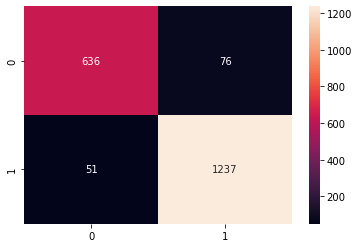

In [37]:
cm3=confusion_matrix(y_true=y_test, y_pred=lgbm_pred) 
sns.heatmap(cm3, annot=True, fmt='')

In [38]:
print('f1_score : {}' .format(f1_score(y_test, lgbm_pred)))

f1_score : 0.9511726259131104


In [39]:
print('precision_score : {}' .format(precision_score(y_test, lgbm_pred)))

precision_score : 0.9421172886519421


In [40]:
print( 'Accuracy: {}' .format(accuracy_score(y_test, lgbm_pred))) 

Accuracy: 0.9365


In [41]:
print( 'recall: {}' .format(recall_score(y_test, lgbm_pred)) )

recall: 0.9604037267080745


In [49]:
param_grid={'n_estimators':[1000, 500,300, 200, 100],
            'min_samples_split':[2,5,7],
           'min_samples_leaf':[8,6,4],
            'max_features':['none', 'auto', 'log']
           }

In [50]:
rcv=RandomizedSearchCV(lgb_m, param_grid,cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1)


In [52]:
rcv.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=1), n_jobs=-1,
                   param_distributions={'max_features': ['none', 'auto', 'log'],
                                        'min_samples_leaf': [8, 6, 4],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [1000, 500, 300, 200,
                                                         100]},
                   scoring='accuracy', verbose=1)

In [53]:
rcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 7,
 'min_samples_leaf': 6,
 'max_features': 'log'}

In [54]:
lgb_m2=lgbm.LGBMClassifier(random_state=1, n_estimators=1000,min_samples_split=7,min_samples_leaf=6,max_features= 'log')
lgb_m2.fit(x_train_scaled, y_train)
lgbm2_pred=lgb_m.predict(x_test_scaled)

In [55]:
print('precision_score : {}' .format(precision_score(y_test, lgbm2_pred)))

precision_score : 0.9421172886519421


In [60]:
label=df.columns

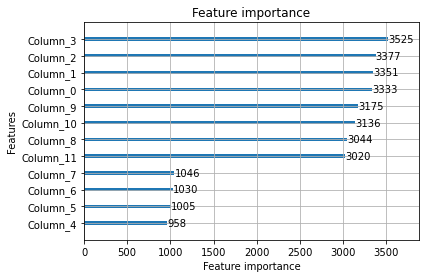

In [74]:
lgbm.plot_importance(lgb_m2, max_num_features=18)
plt.show()
